<a href="https://colab.research.google.com/github/dphi-official/Datathons/blob/master/Top_Notebook_Submissions/Data_Sprint/Data_Sprint_9/Rank_5_UmaRam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Uma Ram**

**Datathon 9 link: https://dphi.tech/practice/challenge/38**


# Data Sprint #9: Credit Risk
Predict if a loan application should be rejected or approved

**Problem Statement**
Imagine a bank in your locality. The bank has realized that applying data science methodologies can help them focus their resources efficiently, make smarter decisions on credit risk calculations, and improve performance.

Earlier they used to check the credit risk of the loan applicants manually by analyzing their bank-related data, which used to take months of time. But this time they want a smart data scientist who can automate this process.

**Objective**
You are required to build a machine learning model that helps you predict the credit risk of the loan applicants.

**Evaluation Criteria**

Submissions are evaluated using Accuracy Score.

**About the Data**
This dataset classifies loan applicants described by a set of attributes as good or bad credit risks.

To load the training data in your jupyter notebook, use the below command:
```
import pandas as pd

audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv" )
```

**Data Description**

There are 20 attributes in the dataset. Some of them are mentioned below:

checking_status: Status of the existing checking account

duration: Duration in month

credit_history: Credit history of the applicant

purpose: Purpose of taking the earlier loans

employment: Present employment since
installment_commitment: Installment rate in percentage of disposable income

personal_status: Personal status and sex

other_parties: Other debtors/guarantors

residence_since: Present residence since

other_payment_plans: Other installment plans

existing_credits: Number of existing credits at this bank

class: The target variable(good, bad)

**Test Dataset**

Load the test data (name it as test_data). You can load the data using the below command.
```
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')

```
Here the target column is deliberately not there as you need to predict it


# **Load Libraries and datasets**

In [ ]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipultion tool
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
# import mean squared error from sklearn.metric
from sklearn.metrics import f1_score, accuracy_score
#Decisoin Tree classifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [ ]:
#Load Dataset 
audit_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/training_set_labels.csv" )
audit_data.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',18,'critical/other existing credit',radio/tv,1800,'<100','1<=X<4',4,'male single',none,2,car,24,none,own,2,skilled,1,none,yes,good
1,'<0',24,'existing paid',radio/tv,2439,'<100','<1',4,'female div/dep/mar',none,4,'real estate',35,none,own,1,skilled,1,yes,yes,bad
2,'no checking',36,'no credits/all paid',repairs,2613,'<100','1<=X<4',4,'male single',none,2,car,27,none,own,2,skilled,1,none,yes,good


In [ ]:
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         800 non-null    object
 1   duration                800 non-null    int64 
 2   credit_history          800 non-null    object
 3   purpose                 800 non-null    object
 4   credit_amount           800 non-null    int64 
 5   savings_status          800 non-null    object
 6   employment              800 non-null    object
 7   installment_commitment  800 non-null    int64 
 8   personal_status         800 non-null    object
 9   other_parties           800 non-null    object
 10  residence_since         800 non-null    int64 
 11  property_magnitude      800 non-null    object
 12  age                     800 non-null    int64 
 13  other_payment_plans     800 non-null    object
 14  housing                 800 non-null    object
 15  existi

In [ ]:
#Rename the column name class
audit_data.rename(columns={'class':'class_status'}, inplace=True)


In [ ]:
ColumnsToRemove=['num_dependents','own_telephone','foreign_worker','other_parties','other_payment_plans','housing']
audit_data.drop(ColumnsToRemove, axis=1, inplace=True)

In [ ]:
#Use label encoding only for purpose column
labelencoder = LabelEncoder()
audit_data['purpose'] = labelencoder.fit_transform(audit_data['purpose'])


In [ ]:
categorical_columns =['checking_status','credit_history','savings_status','employment','personal_status',
                      'property_magnitude','job','class_status'] #,'own_telephone','foreign_worker'
print(categorical_columns)

numerical_columns =['duration','credit_amount','installment_commitment','residence_since','age','existing_credits'] #,'num_dependents']
print(numerical_columns)

['checking_status', 'credit_history', 'savings_status', 'employment', 'personal_status', 'property_magnitude', 'job', 'class_status']
['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits']


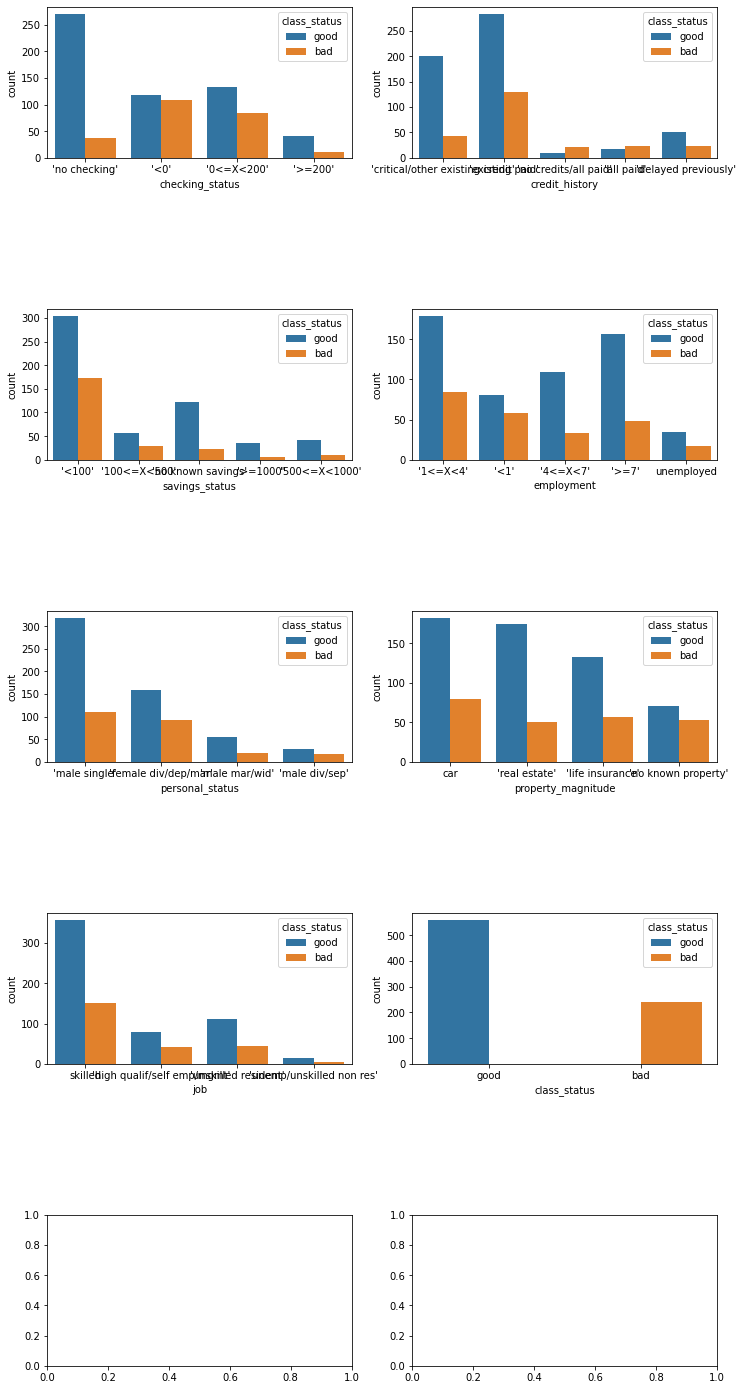

In [ ]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(5,2,figsize=(12,25))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=audit_data,hue='class_status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

         duration  credit_amount  ...         age  existing_credits
count  800.000000     800.000000  ...  800.000000        800.000000
mean    21.031250    3337.878750  ...   35.631250          1.410000
std     12.171502    2866.828413  ...   11.757682          0.574293
min      4.000000     250.000000  ...   19.000000          1.000000
25%     12.000000    1364.000000  ...   26.000000          1.000000
50%     18.000000    2332.000000  ...   33.000000          1.000000
75%     24.000000    4166.000000  ...   42.000000          2.000000
max     60.000000   18424.000000  ...   75.000000          4.000000

[8 rows x 6 columns]


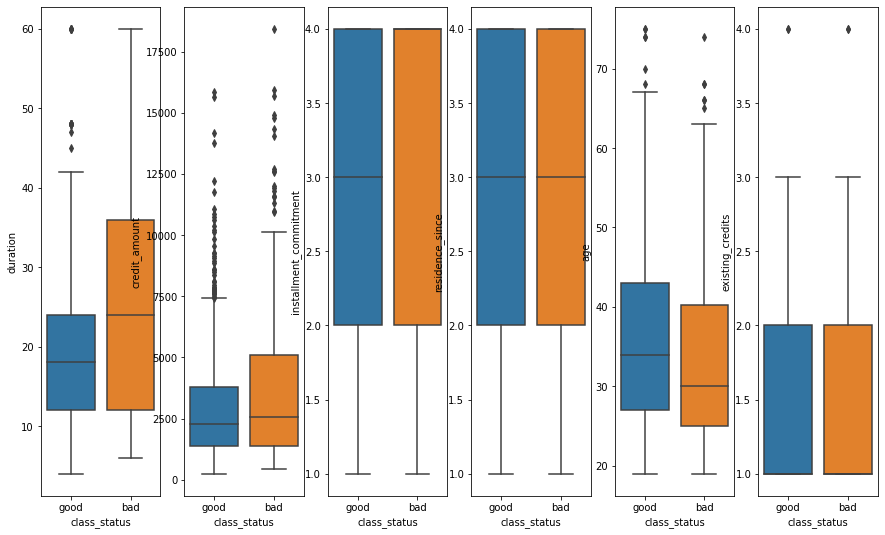

In [ ]:
fig,axes = plt.subplots(1,6,figsize=(15,9))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=audit_data,x='class_status',ax=axes[idx])

print(audit_data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [ ]:
#### Encoding categrical Features: ##########
audit_data_encoded = pd.get_dummies(audit_data,drop_first=True)
audit_data_encoded.head()

,duration,purpose,credit_amount,installment_commitment,residence_since,age,existing_credits,checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'existing paid',credit_history_'no credits/all paid',savings_status_'500<=X<1000',savings_status_'<100',savings_status_'>=1000',savings_status_'no known savings',employment_'4<=X<7',employment_'<1',employment_'>=7',employment_unemployed,personal_status_'male div/sep',personal_status_'male mar/wid',personal_status_'male single',property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,class_status_good
0,18,7,1800,4,2,24,2,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
1,24,7,2439,4,4,35,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,36,8,2613,4,2,27,2,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
3,15,4,4623,3,2,40,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,21,5,3599,1,4,26,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1


In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(audit_data_encoded.corr(),vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

In [ ]:
X = audit_data_encoded.drop('class_status_good', axis=1)
y = audit_data_encoded.class_status_good

In [ ]:
#split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(640, 31)

# Build Models

**DecisionTreeClassifier**

In [ ]:
model_dtc = DecisionTreeClassifier(random_state = 42,min_samples_split=20,max_depth=30)
model_dtc.fit(X_train, y_train)
pred_DTC = model_dtc.predict(X_test)
print('accuracy Score:',accuracy_score(y_test,pred_DTC))

accuracy Score: 0.675


**RandomForestClassifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1,max_depth=15)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print("Accuracy score:", accuracy_score(y_test,pred_rfc))

Accuracy score: 0.7375


**Implementing grid search in random forest model**

In [ ]:
param_grid = {
    'n_estimators' : [200,500],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5)
CV_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=15,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                      

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

**RandomForestClassifier**

In [ ]:
rfc1 = RandomForestClassifier(random_state=42,max_features='log2',n_estimators=500,max_depth=8,criterion='gini')

In [ ]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pred1 = rfc1.predict(X_test)
print("accuracy score : ",accuracy_score(y_pred,pred1))

accuracy score :  0.76875


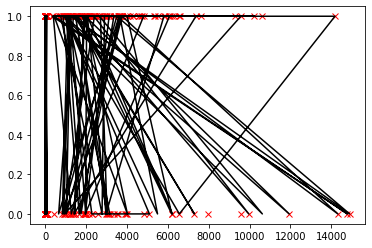

In [ ]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, pred_rfc, color='black')
plt.show()

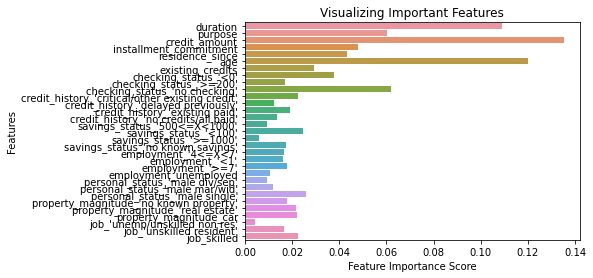

In [ ]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
sns.barplot(x=feat_importances, y=feat_importances.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
rf_sfm = SelectFromModel(rfc)
# Train the selector
rf_sfm = rf_sfm.fit(X_train, y_train)
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)

In [ ]:
X_important_train.shape

(640, 8)

In [ ]:
rfc_clf_important = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfc_clf_important.fit(X_important_train, y_train)
pred_rfc_imp_feat = rfc_clf_important.predict(X_important_test)
print('accuracy Score is: ', accuracy_score(y_test, pred_rfc_imp_feat)) 

accuracy Score is:  0.71875


**LogisticRegressionr**


In [ ]:
model_linear = linear_model.LogisticRegression(max_iter=200,C=2.5,random_state=42,solver='liblinear',penalty='l2')
model_linear.fit(X_train,y_train)
pred_linear = model_linear.predict(X_test)
print('accuracy Score:',accuracy_score(y_test,pred_linear))

accuracy Score: 0.7125


**AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
model_ada = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=300),learning_rate=0.7)
model_ada.fit(X_train,y_train)
pred_ada = model_ada.predict(X_test)
print('accuracy Score:',accuracy_score(y_test,pred_ada))

accuracy Score: 0.725


# Implement testing in the test dataset

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/credit_risk/testing_set_labels.csv')

In [ ]:
test_data.head(4)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',18,'existing paid','new car',2662,'no known savings','4<=X<7',4,'male single',none,3,'life insurance',32,none,own,1,skilled,1,none,no
1,'no checking',18,'existing paid',radio/tv,1505,'<100','1<=X<4',4,'male single',none,2,'no known property',32,none,'for free',1,'high qualif/self emp/mgmt',1,yes,yes
2,'no checking',12,'delayed previously',repairs,1555,'>=1000','>=7',4,'male single',none,4,'no known property',55,none,'for free',2,skilled,2,none,yes
3,'no checking',15,'existing paid','new car',3186,'>=1000','4<=X<7',2,'female div/dep/mar',none,3,car,20,none,rent,1,skilled,1,none,yes


In [ ]:
#test_data=MultiColumnLabelEncoder(ColumnsToLabelEncode).fit_transform(test_data)
test_data.drop(ColumnsToRemove, axis=1, inplace=True)
test_data['purpose'] = labelencoder.fit_transform(test_data['purpose'])
test_data_encoded = pd.get_dummies(test_data,drop_first=True)


In [ ]:
test_data_encoded.head(4)

,duration,purpose,credit_amount,installment_commitment,residence_since,age,existing_credits,checking_status_'<0',checking_status_'>=200',checking_status_'no checking',credit_history_'critical/other existing credit',credit_history_'delayed previously',credit_history_'existing paid',credit_history_'no credits/all paid',savings_status_'500<=X<1000',savings_status_'<100',savings_status_'>=1000',savings_status_'no known savings',employment_'4<=X<7',employment_'<1',employment_'>=7',employment_unemployed,personal_status_'male div/sep',personal_status_'male mar/wid',personal_status_'male single',property_magnitude_'no known property',property_magnitude_'real estate',property_magnitude_car,job_'unemp/unskilled non res',job_'unskilled resident',job_skilled
0,18,1,2662,4,3,32,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
1,18,6,1505,4,2,32,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,12,7,1555,4,4,55,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1
3,15,1,3186,2,3,20,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
#random forest classifier
target=rfc.predict(test_data_encoded) #accuracy 79

In [ ]:
#adaboost
target=model_ada.predict(test_data_encoded) # Accuracy 76.5

In [ ]:
#random forest classifier with grid search view
target=rfc1.predict(test_data_encoded) #accuracy 79

In [ ]:
#store the result in file
res = pd.DataFrame(target)
res[0]=res[0].replace({1:'good',0:'bad'})
res.index = test_data.index 
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('auditsubmission.csv')         
files.download('auditsubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusion : **

In this notebook , I have tried different models and finally random forest classifier with grid search predicted accuracy score 0.79.

We can improve data preprocessing to get better prediction